**Câu I:** Hiển thị theo tọa độ kinh độ - vĩ độ các nước trên bản đồ:           
  1. Tiền xử lí dữ liệu

In [85]:
import pandas as pd
data = pd.read_csv("countries.csv")
for column in data.columns: #Duyệt từng cột
  if data[column].dtype == 'object': #Trường rời rạc thì điền theo tần số cao nhất
    data[column].fillna(data[column].mode()[0], inplace = True)
  else: #Trường số thì điền theo giá trị trung bình
    data[column].fillna(round(data[column].mean(), 2), inplace = True)

2. Hiển thị tọa độ kinh độ - vĩ độ trên bản đồ:

In [86]:
import folium
#Thư viện để tạo và hiển thị bản đồ

#1. Khởi tạo bản đồ với tâm là gốc và độ phóng = 2
map = folium.Map(location=[0, 0], zoom_start=1)

#2. Thêm điểm đánh dấu cho mỗi quốc gia
for index, row in data.iterrows():
    folium.Marker([row['latitude'], row['longitude']], popup=row['country']).add_to(map)

#3. Hiển thị bản đồ
map

**Câu II:** Phân cụm theo các thuật toán, đối sánh kết quả và nhận xét:
1. Thuật toán K-means:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



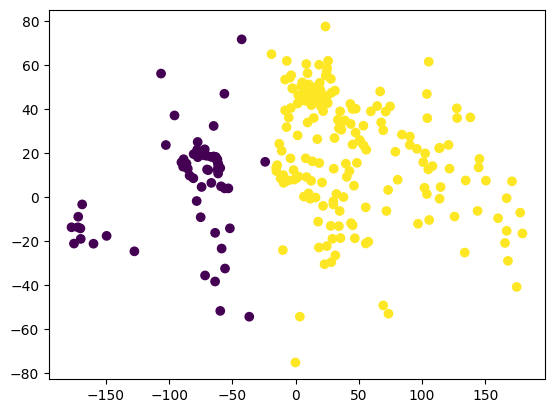

In [87]:
from sklearn.cluster import KMeans #Thuật toán KMeans
import matplotlib.pyplot as plt

#1. Chọn các thuộc tính đầu vào là kinh độ và vĩ độ
X = data[['latitude', 'longitude']]

#2. Khởi tạo mô hình K-Means, phân 2 cụm
kmeans = KMeans(n_clusters=2)

#3. Huấn luyện mô hình với dữ liệu đầu vào
kmeans.fit(X)

#4. Dự đoán nhãn cụm cho mỗi điểm dữ liệu và thêm cột dự đoán vào dữ liệu ban đầu
data['Cluster'] = kmeans.predict(X)

#5. Vẽ biểu đồ
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'])

#6. Hiển thị
plt.show()

Nhận xét: 2 phần latitude và phần longitude đã được phân chia ra 2 nửa của biểu đồ. Latitude tượng trưng cho màu tím, còn longitude tượng trưng cho màu vàng. Nhìn chung tỉ lệ tương đối tốt.

2. Thuật toán DBSCAN:


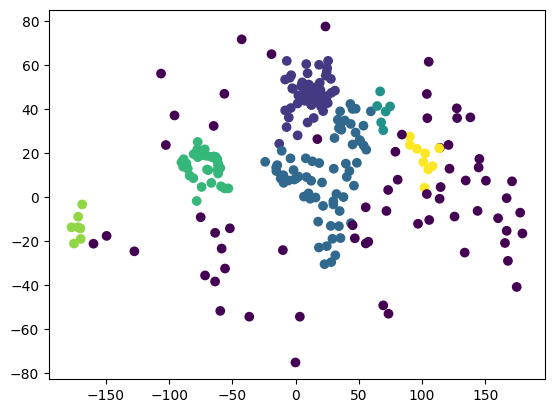

In [88]:
from sklearn.cluster import DBSCAN #Thuật toán DBSCAN

#Đầu vào chọn 2 thông số như cũ
#1. Khởi tạo mô hình DBSCAN với bán kính elipson và số điểm trong 1 cụm
dbscan = DBSCAN(eps=10, min_samples=5)

#2. Dự đoán nhãn cụm cho mỗi điểm dữ liệu và thêm cột dự đoán vào dữ liệu ban đầu
data['Cluster'] = dbscan.fit_predict(X)

#3. Vẽ biểu đồ
plt.scatter(data['longitude'], data['latitude'], c=data['Cluster'])

#4. Hiển thị
plt.show()

Nhận xét: Thuật toán chưa tốt

3. Thuật toán DPC:

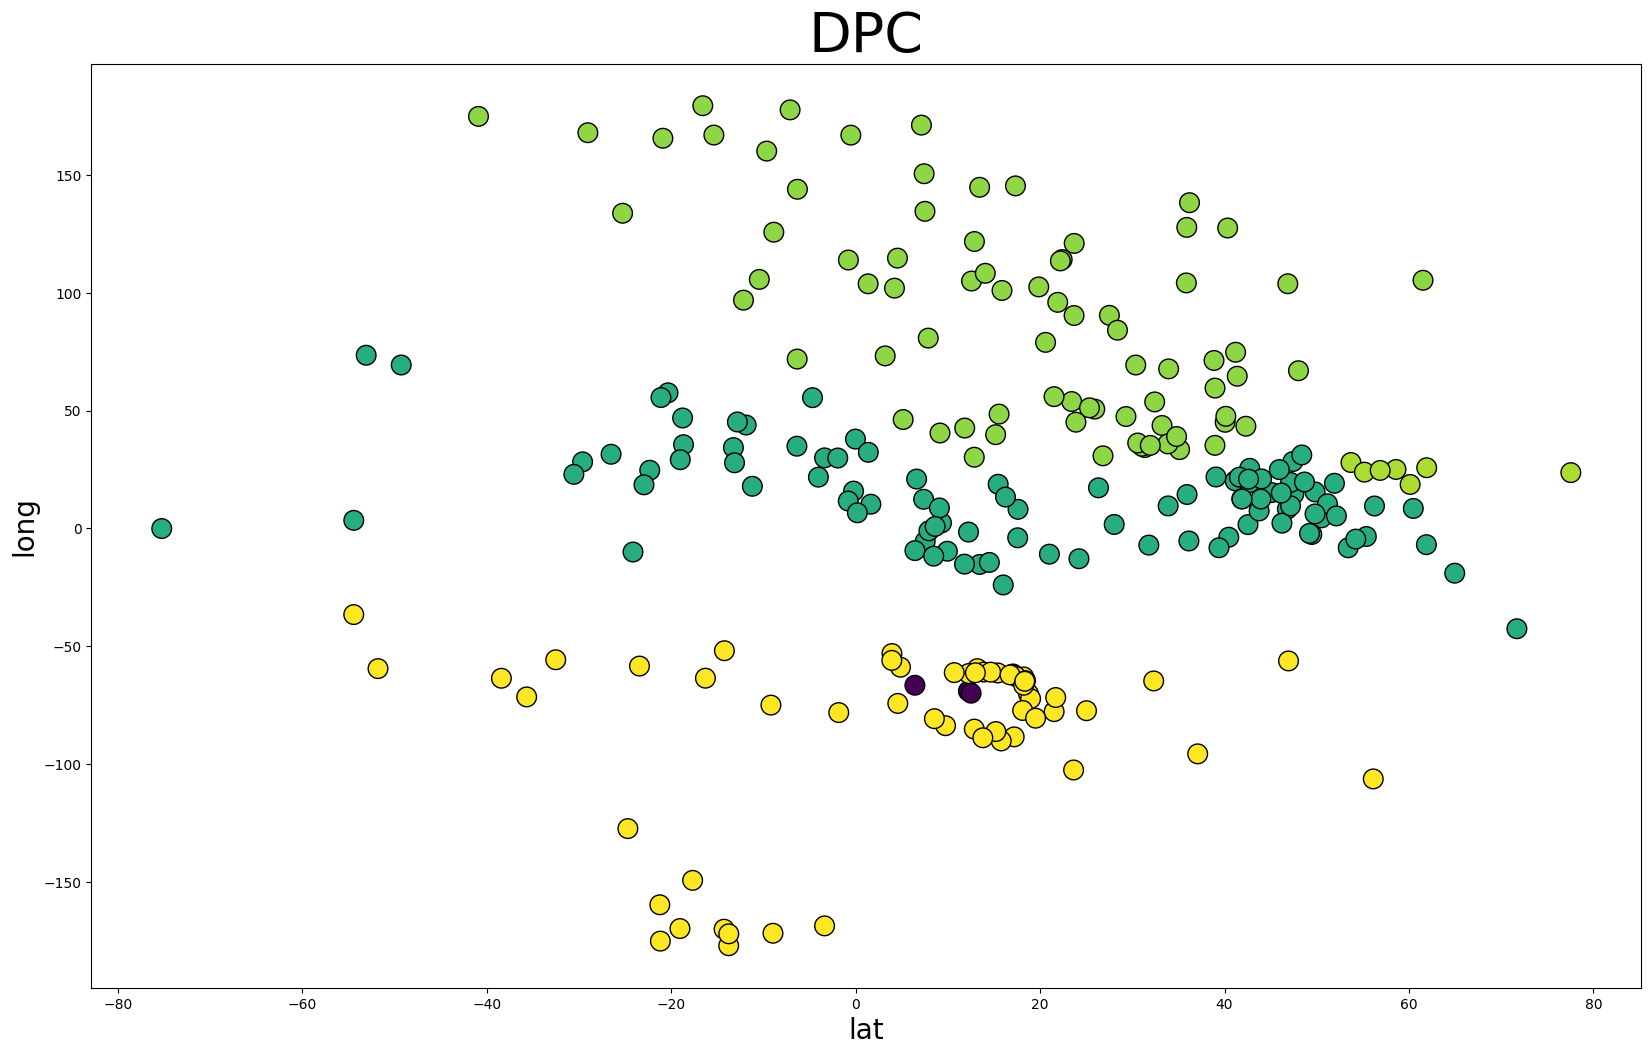

In [89]:
from dpca import DensityPeakCluster
dpca = DensityPeakCluster(distance_threshold=5, anormal=False)
dpca.fit(X)

rho = dpca.local_density()
delta, nneigh = dpca.min_neighbor_and_distance()
labels, center = dpca.collapse()

plt.figure(figsize=(20,12))
plt.scatter(
    data['latitude'], data['longitude'],
    c=labels, marker='o',
    edgecolor='black', s=200
)
plt.xlabel("lat", fontsize=20)
plt.ylabel("long", fontsize=20)
plt.title("DPC", fontsize=40)
plt.show()